RESAMPLING AND NOISE REMOVAL

In [10]:
import os
import librosa
import numpy as np
import soundfile as sf
from scipy.signal import wiener

# Paths
input_dir = "telugu"
output_dir = "processed_speech_wiener"
os.makedirs(output_dir, exist_ok=True)

TARGET_SR = 16000

def estimate_noise(y, frame_length=2048, hop_length=512, top_db=20):
    """
    Estimate noise from low-energy frames.
    """
    intervals = librosa.effects.split(y, top_db=top_db, frame_length=frame_length, hop_length=hop_length)
    noise = []

    prev = 0
    for start, end in intervals:
        if start - prev > hop_length:
            # segment considered silence (possible noise)
            noise.append(y[prev:start])
        prev = end
    noise_est = np.concatenate(noise) if noise else y[:int(0.5 * TARGET_SR)]  # fallback
    return noise_est

def spectral_wiener_denoise(y, sr):
    # Estimate noise using VAD
    noise = estimate_noise(y)

    # STFT of signal and noise
    S = librosa.stft(y)
    N = librosa.stft(noise, n_fft=S.shape[0]*2 - 2)

    # Power spectra
    S_mag, S_phase = np.abs(S), np.angle(S)
    N_mag = np.abs(N)

    # Estimate noise power
    noise_ps = np.mean(N_mag**2, axis=1, keepdims=True)

    # Wiener filter
    signal_ps = S_mag**2
    H = signal_ps / (signal_ps + noise_ps + 1e-10)

    # Apply Wiener filter
    S_denoised = H * S_mag * np.exp(1j * S_phase)
    y_denoised = librosa.istft(S_denoised)
    return y_denoised

def preprocess_audio(file_path, save_path):
    y, sr = librosa.load(file_path, sr=TARGET_SR, mono=True)
    y_denoised = spectral_wiener_denoise(y, sr)

    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    sf.write(save_path, y_denoised, sr)
    return y_denoised

# Emotion folders
emotions = ["angry", "happy", "nuetral", "sad", "suprised"]

for emotion in emotions:
    emotion_path = os.path.join(input_dir, emotion)
    for root, _, files in os.walk(emotion_path):
        for file in files:
            if file.endswith((".wav", ".mp3")):
                input_fp = os.path.join(root, file)
                rel_path = os.path.relpath(input_fp, input_dir)
                output_fp = os.path.join(output_dir, rel_path)

                try:
                    preprocess_audio(input_fp, output_fp)
                    print(f"Processed: {file}")
                except Exception as e:
                    print(f"Error with {file}: {e}")

Processed: S11_ALA_C01_G1_D02_SPKM04_V1_AN5_MMM.wav
Processed: S11_ALA_C05_G1_D06_SPKF03_V1_AN5_MMM.wav
Processed: S11_ALA_C06_G2_D03_SPKF03_V1_AN5_MMM.wav
Processed: S11_ALA_C10_G1_D01_SPKF03_V1_AN5_MMM.wav
Processed: S11_ALA_C14_G1_D05_SPKM05_V2_AN5_MMM.wav
Processed: S11_HAP_C04_G1_D03_SPKM04_V1_AN5_MMM.wav
Processed: S11_HAP_C04_G1_D07_SPKM04_V1_AN5_MMM.wav
Processed: S11_HAP_C04_G1_D11_SPKM04_V1_AN5_MMM.wav
Processed: S11_HAP_C04_G1_D15_SPKM04_V1_AN5_MMM.wav
Processed: S11_POK_C10_G1_D01_SPKF03_V1_AN5_MMM.wav
Processed: S14_RAC_C11_G1_D01_SPKM03_V1_AN4_MMM.wav
Processed: S14_RAC_C11_G1_D03_SPKM03_V1_AN5_MMM.wav
Processed: S14_RAC_CO6_G1_D05_SPKM03_V1_AN5_MMM.wav


C:\Users\sath0\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


Processed: S15_FID_C13_G1_D04_SPKM07_V1_AN4_MMM.wav
Processed: S15_RAN_C01_G1_D03_SPKM06_V1_AN4_MMM.wav
Processed: S15_RAN_C03_G1_D02_SPKM06_V1_AN4_MMM.wav
Processed: S15_RAN_C06_G1_D06_SPKM06_V1_AN4_MMM.wav
Processed: S17_ASH_C01_G1_D03_SPKF06_V1_AN5_MMM.wav
Processed: S17_RAN_C08_G1_D03_SPKM07_V1_AN4_MMM.wav
Processed: S17_RVC_C09_G1_D07_SPKF06_V1_AN5_MMM.wav
Processed: S18_MIR_C05_G1_D05_SPKM09_V1_AN4_MMM.wav
Processed: S18_MIR_C09_G1_D01_SPKM09_V1_AN4_MMM.wav
Processed: S18_SYE_C04_G1_D05_SPKM09_V1_AN4_MMM.wav
Processed: S18_SYE_C04_G1_D07_SPKM09_V1_AN4_MMM.wav
Processed: S18_SYE_C08_G1_D02_SPKM09_V2_AN4_MMM.wav
Processed: S19_GUR_C02_G2_D02_SPKF05_V1_AN5_MMM.wav
Processed: S19_RAC_C06_G1_D06_SPKM05_V1_AN5_MMM.wav


C:\Users\sath0\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(


Processed: S19_RAC_C06_G1_D08_SPKM05_V1_AN5_MMM.wav
Processed: S19_RAC_C11_G1_D01_SPKM06_V1_AN5_MMM.wav
Processed: S19_RAC_C11_G1_D03_SPKM06_V1_AN5_MMM.wav
Processed: S19_RAC_C11_G1_D05_SPKM03_V1_AN5_MMM.wav
Processed: S21_KIC_C03_G2_D06_SPKF05_V1_AN5_MMM.wav
Processed: S21_KIC_C04_G1_D02_SPKF05_V1_AN5_MMM.wav
Processed: S21_KIC_C06_G1_D01_SPKF06_V1_AN5_MMM.wav
Processed: S21_KIC_C06_G1_D01_SPKF06_V2_AN5_MMM.wav
Processed: S21_KIC_C06_G1_D02_SPKF06_V2_AN5_MMM.wav
Processed: S21_KIC_C09_G1_D01_SPKF05_V1_AN5_MMM.wav
Processed: S22_FID_C07_G1_D01_SPKF05_V1_AN5_MMM.wav
Processed: S23_OMF_C06_G2_D02_SPKM11_V1_AN4_MMM.wav
Processed: S27_OMF_C04_G1_D06_SPKF13_V1_AN4_MMM.wav
Processed: S27_OMF_C06_G1_D03_SPKF13_V1_AN4_MMM.wav
Processed: S27_OMF_C06_G1_D05_SPKF13_V1_AN4_MMM.wav
Processed: S27_OMF_C07_G1_D03_SPKF13_V1_AN4_MMM.wav
Processed: S30_GUR_C01_G1_D01_SPKM12_V1_AN4_MMM.wav
Processed: S32_JAM_C01_G1_D05_SPKM11_V1_AN5_MMM.wav
Processed: S32_JAM_C02_G1_D09_SPKM11_V1_AN5_MMM.wav
Processed: S

C:\Users\sath0\AppData\Local\Temp\ipykernel_11904\723529564.py:55: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=TARGET_SR, mono=True)
C:\Users\sath0\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Processed: S46_AAA_C11_G1_D01_SPKF24_V1_SA4_MMM.wav
Processed: S46_BBM_C03_G1_D02_SPKF24_V1_SA4_MMM.wav
Processed: S46_BBM_C03_G1_D10_SPKF24_V1_SA4_MMM.wav
Processed: S49_JJN_C03_G1_D01_SPKF21_V1_SA5_MMM.wav
Processed: S49_JJN_C04_G1_D02_SPKF23_V1_SA4_MMM.wav
Processed: S51_SRI_C10_G1_D04_SPKF24_V1_SA4_MMM.wav
Processed: S93_HAP_C13_G1_D02_SPKM06_V1_SA5_MMM.wav
Processed: S93_HAP_C13_G1_D04_SPKF05_V1_SA5_MMM.wav
Processed: S93_HAP_C15_G1_D02_SPKM06_V1_SA5_MMM.wav
Processed: S93_SVS_C09_G1_D09_SPKF05_V1_SA4_MMM.wav
Processed: S95_BAB_CO16_G1_D03_SPKF01_V1_SA5_MMM.wav
Processed: S95_BAB_CO3_G1_D04_SPKM02_V1_SA4_MMM.wav
Processed: S95_BAB_CO9_G1_D03_SPKM02_V2_SA4_MMM.wav
Processed: S95_MIR_C12_G1_D01_SPKM02_V1_SA5_MMM.wav
Processed: S95_SRI_C14_G2_D01_SPKF01_V1_SA4_MMM.wav
Processed: S95_SRI_CO3_G1_D01_SPKM04_V3_SA5_MMM.wav
Processed: S95_SRI_CO3_G1_D03_SPKF01_V2_SA4_MMM.wav
Processed: S95_SRI_CO4_G1_D05_SPKF02_V2_SA5_MMM.wav
Processed: S95_SYE_CO1_G1_D02_SPKM01_V1_SA4_MMM.wav
Processed: 

LENGTH NORMALIZATION

In [11]:
import os
import librosa
import numpy as np
import soundfile as sf

# Paths
input_dir = "processed_speech_wiener"
output_dir = "length_normalized_speech_1"
os.makedirs(output_dir, exist_ok=True)

# Parameters
TARGET_SR = 16000  # Target sample rate
TARGET_DURATION = 4  # Target duration in seconds
TARGET_LENGTH = TARGET_DURATION * TARGET_SR  # Target length in samples

def normalize_length(y, target_length, sr):
    """
    Normalize the length of the audio to the target length by repeating the full audio
    or truncating it to match the target duration in seconds.
    """
    target_samples = target_length * sr  # Convert target length in seconds to samples

    if len(y) < target_samples:
        # Repeat the whole audio until we reach the target length
        num_repeats = (target_samples // len(y)) + 1
        repeated = np.tile(y, num_repeats)
        y_normalized = repeated[:target_samples]  # Trim to exact length
    else:
        # Truncate if longer
        y_normalized = y[:target_samples]

    return y_normalized

# Loop through all emotion directories to normalize audio length
emotions = ["angry", "happy", "nuetral", "sad", "suprised"]

for emotion in emotions:
    emotion_path = os.path.join(input_dir, emotion)

    for root, _, files in os.walk(emotion_path):
        for file in files:
            if file.endswith((".wav", ".mp3")):
                input_fp = os.path.join(root, file)

                try:
                    # Load the audio file
                    y, sr = librosa.load(input_fp, sr=TARGET_SR, mono=True)

                    # Normalize the length of the audio
                    y_normalized = normalize_length(y, TARGET_DURATION, TARGET_SR)

                    # Save the normalized audio to the output directory
                    output_fp = os.path.join(output_dir, emotion, file)
                    os.makedirs(os.path.dirname(output_fp), exist_ok=True)
                    sf.write(output_fp, y_normalized, TARGET_SR)
                    print(f"Processed and normalized: {file}")
                except Exception as e:
                    print(f"Error processing {file}: {e}")

Processed and normalized: S11_ALA_C01_G1_D02_SPKM04_V1_AN5_MMM.wav
Processed and normalized: S11_ALA_C05_G1_D06_SPKF03_V1_AN5_MMM.wav
Processed and normalized: S11_ALA_C06_G2_D03_SPKF03_V1_AN5_MMM.wav
Processed and normalized: S11_ALA_C10_G1_D01_SPKF03_V1_AN5_MMM.wav
Processed and normalized: S11_ALA_C14_G1_D05_SPKM05_V2_AN5_MMM.wav
Processed and normalized: S11_HAP_C04_G1_D03_SPKM04_V1_AN5_MMM.wav
Processed and normalized: S11_HAP_C04_G1_D07_SPKM04_V1_AN5_MMM.wav
Processed and normalized: S11_HAP_C04_G1_D11_SPKM04_V1_AN5_MMM.wav
Processed and normalized: S11_HAP_C04_G1_D15_SPKM04_V1_AN5_MMM.wav
Processed and normalized: S11_POK_C10_G1_D01_SPKF03_V1_AN5_MMM.wav
Processed and normalized: S14_RAC_C11_G1_D01_SPKM03_V1_AN4_MMM.wav
Processed and normalized: S14_RAC_C11_G1_D03_SPKM03_V1_AN5_MMM.wav
Processed and normalized: S14_RAC_CO6_G1_D05_SPKM03_V1_AN5_MMM.wav
Processed and normalized: S15_FID_C13_G1_D04_SPKM07_V1_AN4_MMM.wav
Processed and normalized: S15_RAN_C01_G1_D03_SPKM06_V1_AN4_MMM

In [8]:
import os
from IPython.display import Audio

# Function to listen to the audio
def listen_to_audio(file_path):
    if os.path.exists(file_path):
        return Audio(file_path)  # This will create an audio player in the notebook
    else:
        print(f"File does not exist: {file_path}")
        return None

# Example paths for preprocessed and non-preprocessed audio files
preprocessed_audio_path = "length_normalized_speech_1/angry/S11_ALA_C05_G1_D06_SPKF03_V1_AN5_MMM.wav"

# Listen to the preprocessed audio file
listen_to_audio(preprocessed_audio_path)

FEATURE EXTRACTION

In [12]:
import os
import numpy as np
import librosa
import pandas as pd

# Path to normalized audio files
input_dir = "length_normalized_speech_1"
emotions = ["angry", "happy", "nuetral", "sad", "suprised"]
TARGET_SR = 16000

feature_list = []
label_list = []

def extract_features(y, sr):
    # --- MFCC ---
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # --- Zero Crossing Rate ---
    zcr = librosa.feature.zero_crossing_rate(y)

    # --- Energy ---
    energy = np.array([np.sum(y[i:i+2048]**2) for i in range(0, len(y), 512)])
    energy = energy.reshape(1, -1)

    # --- Pitch (Fundamental Frequency Estimation) ---
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = np.max(pitches, axis=0).reshape(1, -1)

    # Pad features to same length before flattening
    def pad_to_max(arr, target_len):
        if arr.shape[1] < target_len:
            pad_width = target_len - arr.shape[1]
            arr = np.pad(arr, ((0, 0), (0, pad_width)), mode='constant')
        else:
            arr = arr[:, :target_len]
        return arr

    max_len = max(mfcc.shape[1], zcr.shape[1], energy.shape[1], pitch.shape[1])
    mfcc = pad_to_max(mfcc, max_len)
    zcr = pad_to_max(zcr, max_len)
    energy = pad_to_max(energy, max_len)
    pitch = pad_to_max(pitch, max_len)

    # Flatten and concatenate
    features = np.concatenate([mfcc, zcr, energy, pitch], axis=0).flatten()
    return features

# Iterate through each emotion folder and audio file
for emotion in emotions:
    folder = os.path.join(input_dir, emotion)
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith(('.wav', '.mp3')):
                file_path = os.path.join(root, file)
                try:
                    y, sr = librosa.load(file_path, sr=TARGET_SR)
                    features = extract_features(y, sr)
                    feature_list.append(features)
                    label_list.append(emotion)
                    print(f"Extracted features from: {file}")
                except Exception as e:
                    print(f"Error with {file}: {e}")

# Convert to DataFrame
max_feature_len = max(len(f) for f in feature_list)
for i in range(len(feature_list)):
    # Pad with zeros to make all rows the same length
    if len(feature_list[i]) < max_feature_len:
        feature_list[i] = np.pad(feature_list[i], (0, max_feature_len - len(feature_list[i])))

df = pd.DataFrame(feature_list)
df['label'] = label_list

# Save to CSV
df.to_csv("features_mfcc_zcr_pitch_energy.csv", index=False)
print("Saved features to features_mfcc_zcr_pitch_energy.csv")

Extracted features from: S11_ALA_C01_G1_D02_SPKM04_V1_AN5_MMM.wav
Extracted features from: S11_ALA_C05_G1_D06_SPKF03_V1_AN5_MMM.wav
Extracted features from: S11_ALA_C06_G2_D03_SPKF03_V1_AN5_MMM.wav
Extracted features from: S11_ALA_C10_G1_D01_SPKF03_V1_AN5_MMM.wav
Extracted features from: S11_ALA_C14_G1_D05_SPKM05_V2_AN5_MMM.wav
Extracted features from: S11_HAP_C04_G1_D03_SPKM04_V1_AN5_MMM.wav
Extracted features from: S11_HAP_C04_G1_D07_SPKM04_V1_AN5_MMM.wav
Extracted features from: S11_HAP_C04_G1_D11_SPKM04_V1_AN5_MMM.wav
Extracted features from: S11_HAP_C04_G1_D15_SPKM04_V1_AN5_MMM.wav
Extracted features from: S11_POK_C10_G1_D01_SPKF03_V1_AN5_MMM.wav
Extracted features from: S14_RAC_C11_G1_D01_SPKM03_V1_AN4_MMM.wav
Extracted features from: S14_RAC_C11_G1_D03_SPKM03_V1_AN5_MMM.wav
Extracted features from: S14_RAC_CO6_G1_D05_SPKM03_V1_AN5_MMM.wav
Extracted features from: S15_FID_C13_G1_D04_SPKM07_V1_AN4_MMM.wav
Extracted features from: S15_RAN_C01_G1_D03_SPKM06_V1_AN4_MMM.wav
Extracted 

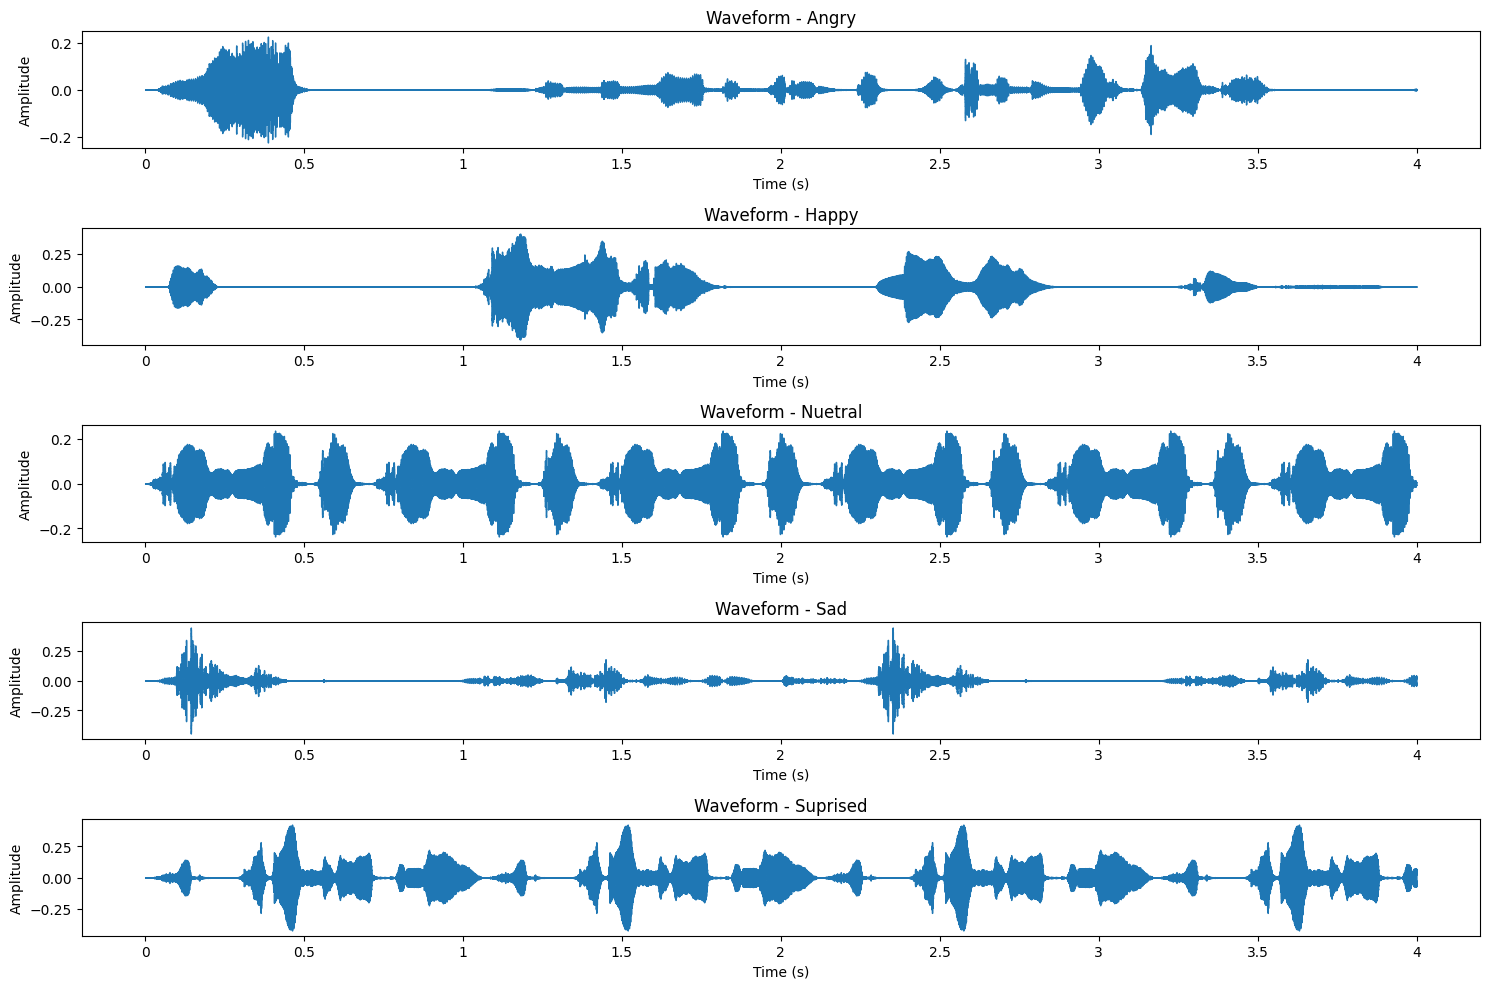

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os

# Directory with normalized audio
normalized_dir = "length_normalized_speech_1"

# Emotions to process
emotions = ["angry", "happy", "nuetral", "sad", "suprised"]

# Plot settings
plt.figure(figsize=(15, 10))
TARGET_SR = 16000

for i, emotion in enumerate(emotions, 1):
    emotion_dir = os.path.join(normalized_dir, emotion)
    
    # Get the first audio file from the emotion directory
    try:
        first_file = next(f for f in os.listdir(emotion_dir) if f.endswith(('.wav', '.mp3')))
        file_path = os.path.join(emotion_dir, first_file)

        # Load audio
        y, sr = librosa.load(file_path, sr=TARGET_SR)

        # Plot waveform
        plt.subplot(5, 1, i)
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform - {emotion.capitalize()}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
    except Exception as e:
        print(f"Could not plot for {emotion}: {e}")

plt.tight_layout()
plt.show()

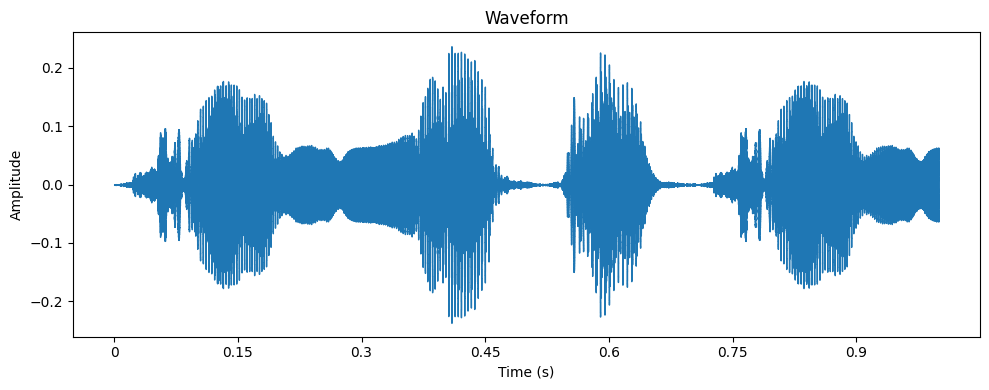

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Settings
emotion = "nuetral"  # As per your directory naming
normalized_dir = "length_normalized_speech_1"
emotion_dir = os.path.join(normalized_dir, emotion)
TARGET_SR = 16000  # Hz
DURATION_SECONDS = 1  # Plot only 1 second

try:
    # Get the first audio file from the "nuetral" folder
    first_file = next(f for f in os.listdir(emotion_dir) if f.endswith(('.wav', '.mp3')))
    file_path = os.path.join(emotion_dir, first_file)

    # Load audio file
    y, sr = librosa.load(file_path, sr=TARGET_SR)

    # Slice to first 1 second
    y_1s = y[:DURATION_SECONDS * sr]

    # Plot waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y_1s, sr=sr)
    plt.title(f"Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error processing {emotion} file: {e}")
